In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
%matplotlib inline

### WE IMPORT THE DATA FROM THE NOAA NATIONAL CENTER FOR ENVIRONMENT INFORMATION
<ul>
    <li> it has global historical weather information
     <li>we colectdata from GCOS surface network
     <li> a global observation station
</ul>

In [5]:
datafile = open('ghcnd-stations.txt','r')


In [19]:
datafile.seek(0)

In [20]:
datafile.readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

## data description

<ul>
    <li> first column is the station code
     <li> second and third is the longitude and latitude
     <li> fourth line is the sea leavel
     <li> Name of the location
     <li> GSN is the weather network that we are using
     <li> Last one not sure may be location code
<ul>

In [67]:
## we take the data only which is only by the GSN
station = {}
for line in open('ghcnd-stations.txt','r'): ## read the file and iterate 
    ## loop through the line
    if 'GSN' in line:                        ## if the gsn in there
        fields = line.split()              ## split the data
        ## we need the station
        station[fields[0]] = ' '.join(fields[4:])   ## key will be the first item which is station code and
                                                    ## value will be the location name +GSN+ code

In [68]:
def findstation(s):
    found = {code: name for code,name in station.items() if s in name}
    print found

In [79]:
li=[]
def find_all_GSN_in_list():
    for code,name in station.items():
        if 'GSN' in name:
            li.append({code:name})

In [80]:
find_all_GSN_in_list()

In [85]:
def find_station_alternative(identity):
    for code,name in station.items():
        if identity in name:
            found = {code: name}
            return found
    

In [86]:
find_station_alternative('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}

In [88]:
find_station_alternative('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}

In [89]:
find_station_alternative('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}

In [90]:
find_station_alternative('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}

In [123]:
def get_the_station():
    station_code=[]
    stations = ['LIHUE','SAN DIEGO','MINNEAPOLIS','IRKUTSK']
    for item in stations:
        code = find_station_alternative(item)
        station_code.append(code.keys())
    return station_code
    
        

In [126]:
data=get_the_station()

In [130]:
flattened_list = [y for x in data for y in x]

In [140]:
code_list=[]
def flattern_list_alt():
    for x in data:
        for y in x:
            code_list.append(y)
    return code_list

In [141]:
flattern_list_alt()

['USW00022536', 'USW00023188', 'USW00014922', 'RSM00030710']

In [142]:
## locad tempareture in the data
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

## descripting of the images
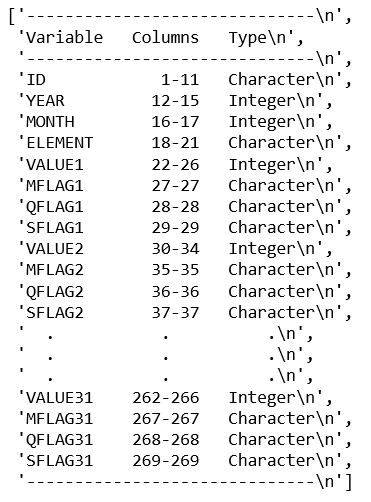